
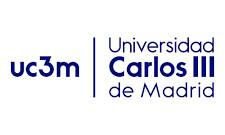


> **Algortimos de Back-Office**
>
> **Máster Universitario en Tecnologías del sector financiero: FINTECH**
>
> **Universidad Carlos III de Madrid**
>
> **2025/2026**
>
> **Nombre y apellidos del Alumno:** 

# Práctica 1: Bonos e Instrumentos Derivados de Tipos de Interés 

## Consideraciones Generales

 * El alumno deberá entregar la práctica en un único fichero `*.ipyb` con formato `"NombreApellidos.ipyb"`
 * La entrega del ejercicio es requisito indispensable para superar la asignatura
 * El ejercicio es individual e intrasferible
 * Es necesario alcanzar una calificación mínima de $4.0/10.0$ en la práctica para superar la materia
 * El ejercicio se debe entregar en el curso virtual de la asignatura antes de la fecha establecida
   

## Criterios de evaluación

 * Motivación, argumentación y explicación de las soluciones propuestas
 * Claridad de la exposición y capacidad de síntesis
 * Empleo de Markdown para comentarios y exposición de ideas y $\LaTeX$ para las fórmulas matemáticas
 * Los ejercicios de programación se realizarán en `C++`. Se valorará
   * Código estructurado en clases y funciones
   * Añada las cabeceras necesarias en cada sección de código. Ej: `#include <cmath>`
   * Empleo de la `STL` y características `C++11/C++17`   
   * Incorporar trazas en el código empleando `std::cout` para mostrar resultados intermedios y resultados finales
   * Emplear la semántica de movimiento `std::move()` en los constructores de clase
 * Puede emplear una o varias secciones de markdown y/o código para cada cuestión. No hay un tamaño tasado
 * Es imprescindible mencionar la bibliografía consultada en formato **APA** ([Citas APA UC3M](https://uc3m.libguides.com/guias_tematicas/citas_bibliograficas/APA)) en cada ejercicio o al final del documento
 * Se cuidará la ortografía y gramática. El código y comentarios en el código se realizarán en **inglés** mientras que los ejercicios de exposición se redactarán en **castellano/español**
  

## Ejercicio 1 : Elabore diez preguntas tipo test del primer capítulo del manual de la asignatura

Redacte diez preguntas tipo test del primer capítulo del manual de la asignatura **Quantitative Finance: Code, Concepts, and Practice. A Practitioner's Guide for Financial Engineers**. Puede encontar el manual en el curso virtual de la asignatura.

Cada pregunta tiene que tener cuatro opciones posibles, de las cuales únicamente una de ellas es totalmente cierta.

Las preguntas se deben redactar en Markdown y se tiene que indicar la opción correcta de manera clara.

Puede usted consultar el apartado **Self-Assessment: Financial Markets** como guía.


## Ejercicio 2 : Valoración de Bonos

### Ejercicio 2.1: Precio de Bonos Cupón Zero

Dada la siguiente matriz, que contiene zero Coupon Rates, redacte una rutina en C++ que calcule los precios de los bonos cupón zero (también conocidos como factores de descuento) para cada fecha. Ejecute la rutina con las fechas y los tipos cupón cero facilitados en la matriz.

Se sugiere la siguiente signatura para la función objetivo:

`std::vector<double> getDiscountFactors(const std::vector<double>& maturities, const std::vector<double>& zeroRates)`

Considere `std::generate()` para la generación de fechas en períodos semianuales sucesivos.

Maturity (years)| Zero Coupon Rate
:---|:---: 
0.5 | 2.0
1.0 | 2.1
1.5 | 2.2
2.0 | 2.3
2.5 | 2.4
3.0 | 2.5
3.5 | 2.6
4.0 | 2.7
4.5 | 2.8
5.0 | 2.9
5.5 | 3.0
6.0 | 3.1
6.5 | 3.2
7.0 | 3.3
7.5 | 3.4
8.0 | 3.5
8.5 | 3.6
9.0 | 3.7
9.5 | 3.8
10.0 | 4.0

### Ejercicio 2.2: Precio teórico de Bonos y Par Yield

Calcule el precio teórico y *par yield* (No es necesario calcular *bond yield*) de los siguientes Bonos:
 1. **Bono 1**: Bono con vencimiento 2 años, principal de \$100 y cupones con tasa anual del 5\% pagados con frecuencia semianual
 2. **Bono 2**: Bono con vencimiento 10 años, principal de \$100 y cupones con tasa anual del 4\% pagados con frecuencia anual
 
Para ello:

1. Escriba una clase `YieldCurve` que contenga fracciones de año y factores de descuento (sinónimo de bonos cupón cero). No es necesario que interpole factores de descuento entre fechas. Puede emplear en la rutina del ***ejercicio 2.1***

> Se sugiere el siguiente constructor y disponer de un método para calcular factores de descuento:
>
> `YieldCurve(std::vector<double> zeroCouponBondPrices, std::vector<double> maturities)`
>
> `double getDiscountFactor(double accrualFraction) const`

Evalúe la posibilidad de emplear `std::lower_bound` para realizar búsquedas ordenadas en vectores de fechas.

Instancie un objeto curva con los datos del ***ejercicio 2.1***

> `std::shared_ptr<YieldCurve> myCurve = std::make_shared<YieldCurve>(zeroCouponBondPrices, maturities);`
    

2. Escriba una clase `Bond` en C++ que contenga como miembros de la clase las principales características de un bono. Se sugiere las siguientes variables miembro (puede añadir otras que le resulten de utilidad):
 * Cupón anualizado
 * Fechas de los cupones en fracción de año
 * *Maturity* del bono
 * Nominal de la inversión
 * frecuencia de pago de cupón
 * Precio teórico
 * *Par yield*
 
> Se sugiere como constructor:
> 
> `Bond(int maturity, double coupon, int frequency, double notional, std::vector<double> couponDates, const std::shared_ptr<YieldCurve>& mycurve)`
 
La clase debe disponer métodos `double computeBondPrice()` y `double computeParYield()`.

Además, es recomendable disponer de métodos `get()` que permitan recuperar los principales parámetros de riesgo (variables miembro de la clase).


### Ejercicio 2.3: Cálculo de la duración y convexidad de Bonos

Para los bonos definidos en el ejercicio 1.4, calcule dos funciones adiciones dentro de la clase Bond que nos permita calcular la duración y convexidad.

$    D = \sum_{i=1}^N t_i [ \frac{c_i e^{-y t_i}}{B} ]$

$    C = \frac{1}{B} \frac{d^2 B}{dy^2} = \frac{\sum_{i=1}^N c_i t_i^2 e^{-y t_i}}{B} $


> Se sugieren los siguientes métodos:
>
> `double computeBondDuration()`
>
> `double computeBondConvexity()`

No es necesario almacenar como variables miembro de la clase la **duración** y la **convexidad** del bono.

### Ejercicio 2.4: Duración y convexidad de Bonos

a) Justifique los resultados obtenidos para la **duración** de cada bono respecto de la duración del bono cupón cero correspondiente en el ***ejercicio 2.3***

b) Responda brevemente a las siguientes cuestiones

 * ¿Por qué es tan popular el concepto de Duración de un Bono? Justifique su respuesta
 
 * ¿Para qué se emplea la convexidad? Justifique su respuesta
 
 * Justifique el empleo de la duración y la convexidad desde un punto de vista matemático



***Algortimos de Back-Office***

***2025-26***

***Miguel Ausín Amigo***

***Licencia:*** <https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en>